#ML day8 
>今天的目标是 linear regression





#概述
y=XW  
where:

* y = 预测值 | ∈$\mathbb{R}^{NX1}$ (N 是样本的个数)
* X = 输入  | ∈$\mathbb{R}^{NXD}$ (D 是特征的个数)
* W = 权重  | ∈$\mathbb{R}^{DX1}$

>通过线性模型的输入 X 去预测 y。模型将会寻找一条最优的线使得我们的预测值和目标值最为接近。训练数据 (X,y) 用来训练这个模型并且通过随机梯度下降(SGD)学习权重 W。

**随机梯度下降(stochastic gradient descent，SGD)**  
$θ=θ-a*\frac{dJ(θ)}{dθ}$

#训练  
**步骤:**

1. 随机初始化模型的权重W。
2. 将输入值 X 传入模型并且得到预测值y^。
3. 通过损失函数来计算预测值y^和真实值y^之间的差距，从而得到损失值J。普遍在线性回归中用到的损失函数是均方误差(MSE)。这个函数计算出预测值和真实值之间的差距的平方(12 没有数学意义，只是在求导的时候可以正好和平方抵消，方便计算)。
* $MSE=J(θ)=\frac{1}{2}\sum_i(\hat{y_i}−y_i)^2$
4. 计算出对于模型权重的损失梯度J(θ)
*  $J(θ)=\frac{1}{2}\sum_i(\hat{y_i}-y_i)^2=\frac{1}{2}\sum_i(X_iW-y_i)^2$
*  $\frac{\partial J}{\partial W}=X\sum_i(\hat{y_i}-y_i)$
5. 我们使用学习率α和一个优化方法(比如随机梯度下降)，通过反向传播来更新权重W。 一个简单的比方就是梯度可以告诉你在哪个方向上增加数值，然后通过减法来使得损失值J(θ)越来越小。
* $W=W-α\frac{\partial J}{\partial W} $
6. 重复2 - 4步直到模型表现最好（也可以说直到损失收敛）。


#数据
创建一些测试数据

In [ ]:
from argparse import Namespace
#
import numpy as np 
import pandas as pd
#用于数据处理
import matplotlib.pyplot as plt
#用于画图

args=Namespace(
  seed=123,
  data_file="sample_data.csv",
  num_samples=100,
  train_size=0.75,
  test_size=0.25,
  num_epochs=100,
)
np.random.seed(args.seed)

In [ ]:
#生成数据
def generate_data(num_samples):
  X=np.array(range(num_samples))
  Y=3.5*X+10
  return X,Y

In [ ]:
#获取数据
X,Y=generate_data(args.num_samples)
data=np.stack([X,Y],axis=1)
df=pd.DataFrame(data,columns=["x","y"])
df.head()


,x,y
0,0.0,10.0
1,1.0,13.5
2,2.0,17.0
3,3.0,20.5
4,4.0,24.0


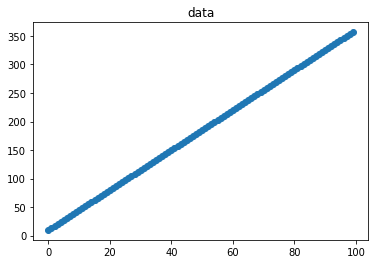

In [ ]:
plt.title("data")
plt.scatter(df["x"],df["y"])
plt.show()

#Scikit_learn
这边了解一下即可，ML不用这个  
SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(df["x"].values.reshape(-1,1),df["y"],
                      test_size=args.test_size,random_state=args.seed)
#reshape(-1,1) 转为n*1的列向量
print("x_train",X_train.shape)
print("y_train",y_train.shape)
print("x_test",X_test.shape)
print("y_test",y_test.shape)

x_train (75, 1)
y_train (75,)
x_test (25, 1)
y_test (25,)


In [ ]:
from pandas.core.common import standardize_mapping
#标准化训练集数据（mean=0,std=1)
X_scaler=StandardScaler().fit(X_train)
y_scaler=StandardScaler().fit(y_train.values.reshape(-1,1))

#standardize
standardize_x_train=X_scaler.transform(X_train)
standardize_y_train=y_scaler.transform(y_train.values.reshape(-1,1)).ravel()
standardize_x_test=X_scaler.transform(X_test)
standardize_y_test=y_scaler.transform(y_test.values.reshape(-1,1)).ravel()

#测试
print("mean",np.mean(standardize_x_train,axis=0),np.mean(standardize_y_train,axis=0))
print("std:",np.std(standardize_x_train,axis=0),np.std(standardize_y_train,axis=0))

mean [4.14483263e-17] 8.881784197001253e-18
std: [1.] 1.0000000000000002


In [ ]:
#inite
lm=SGDRegressor(loss='squared_error',penalty='none',max_iter=args.num_epochs)
#train
lm.fit(X=standardize_x_train,y=standardize_y_train)


SGDRegressor(max_iter=100, penalty='none')

In [ ]:
#predicate
pred_train=(lm.predict(standardize_x_train)*np.sqrt(y_scaler.var_))+y_scaler.mean_
pred_test=(lm.predict(standardize_x_test)*np.sqrt(y_scaler.var_))+y_scaler.mean_
#MSE of train,test 均方误差
train_mse=np.mean((y_train-pred_train)**2)
test_mse=np.mean((y_test-pred_test)**2)
print("train_MSE:",train_mse,"test_MSE:",test_mse)

train_MSE: 21.412440670322795 test_MSE: 18.991996008035738


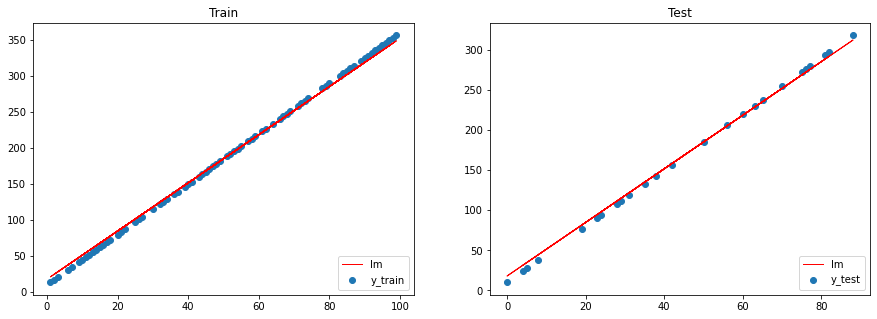

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title("Train")
plt.scatter(X_train,y_train,label="y_train")
plt.plot(X_train,pred_train,color="red",linewidth=1,linestyle="-",label="lm")
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label="y_test")
plt.plot(X_test, pred_test, color="red", linewidth=1, linestyle="-", label="lm")
plt.legend(loc='lower right')

plt.show()
